In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sys

In [80]:
# # Load the Wine Dataset
df_wine = pd.read_csv("data/winemag-data-130k-v2.csv", encoding = 'utf8')

In [81]:
df_wine.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [82]:
#df_wine = df_wine.drop('points', 1)

In [83]:
print(df_wine.dtypes)

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object


In [84]:
# Finding the number of rows with NULL values
df_wine.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [85]:
# DROP region_2 column since most of the records NULL and we have region_1
df_wine = df_wine.drop('region_2', 1)

In [86]:
# DROP rows with NULL values
df_wine=df_wine.dropna()
df_wine.shape

(52106, 13)

In [87]:
df_wine['price'].describe()

count    52106.000000
mean        39.744847
std         36.662203
min          4.000000
25%         20.000000
50%         30.000000
75%         50.000000
max       2013.000000
Name: price, dtype: float64

<h3> LR with outliers in Training set </h3>

In [88]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]


df_X = df_wine[['price']]
df_Y = df_wine[['points']]

# training and test separation
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.20)

# remove outliers from testing
print("test data with outliers", X_test.shape, y_test.shape)
# clean prices from testing
test_prices_wo_outliers = reject_outliers(X_test.values)
# remove points from test set if price was an outlier
min_price = min(test_prices_wo_outliers)
max_price = max(test_prices_wo_outliers)

test_price_points = pd.concat([X_test, y_test], axis=1)
test_price_points = test_price_points.drop(test_price_points[test_price_points.price < min_price].index)
test_price_points = test_price_points.drop(test_price_points[test_price_points.price > max_price].index)

X_test = test_price_points['price'].values.reshape(-1, 1)
y_test = test_price_points['points'].values.reshape(-1, 1)
print("test data without outliers", X_test.shape, y_test.shape)


model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

w = model.coef_[0] # parameters of model
b = model.intercept_ #intercept of model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = model.score(X_test, y_pred)

print("\nRegression results with outliers in training: ")

print("coeficient: ", w)
print("intercept: ", b)

print("mse: ", mse)
print("r2_score: ", r2_score)

test data with outliers (10422, 1) (10422, 1)
test data without outliers (10119, 1) (10119, 1)

Regression results with outliers in training: 
coeficient:  [0.03566867]
intercept:  [87.61282076]
mse:  6.693679123633114
r2_score:  1.0


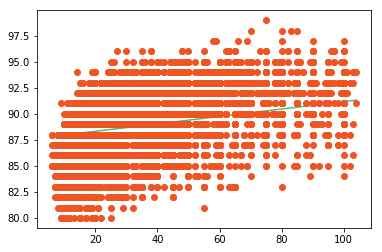

In [89]:
max_x = np.max(X_test)
min_x = np.min(X_test)

x = np.linspace(min_x, max_x, 1000)
y = b + w*x

plt.plot(x, y,'-', color="#58b970")
plt.plot(X_test, y_test,'o', color="#ef5423")

<h3> LR without outliers in Training set </h3>

In [90]:
# remove outliers from training data
print("training data with outliers", X_train.shape, y_train.shape)

training_prices_wo_outliers = reject_outliers(X_train.values)
# remove points from test set if price was an outlier
min_price = min(training_prices_wo_outliers)
max_price = max(training_prices_wo_outliers)

training_price_points = pd.concat([X_train, y_train], axis=1)
training_price_points = training_price_points.drop(training_price_points[training_price_points.price < min_price].index)
training_price_points = training_price_points.drop(training_price_points[training_price_points.price > max_price].index)

X_train = training_price_points['price'].values.reshape(-1, 1)
y_train = training_price_points['points'].values.reshape(-1, 1)
print("training data without outliers", X_train.shape, y_train.shape)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

w = model.coef_[0] # parameters of model
b = model.intercept_ #intercept of model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = model.score(X_test, y_pred)

print("\nRegression results without outliers in training: ")

print("coeficient: ", w)
print("intercept: ", b)

print("mse: ", mse)
print("r2_score: ", r2_score)

training data with outliers (41684, 1) (41684, 1)
training data without outliers (40457, 1) (40457, 1)

Regression results without outliers in training: 
coeficient:  [0.0742449]
intercept:  [86.27667312]
mse:  6.006410229491442
r2_score:  1.0


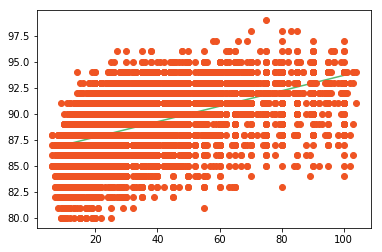

In [91]:
max_x = np.max(X_test)
min_x = np.min(X_test)

x = np.linspace(min_x, max_x, 1000)
y = b + w*x

plt.plot(x, y,'-', color="#58b970")
plt.plot(X_test, y_test,'o', color="#ef5423")

# Convert categorical COUNTRY column to Numeric

In [92]:
df_wine['country'].unique()

array(['US', 'Spain', 'Italy', 'France', 'Argentina', 'Australia',
       'Canada'], dtype=object)

In [93]:
df_country = df_wine.country.str.get_dummies() # get the pivot of the country attribte
df_country.columns = ['from_' + col for col in df_country.columns] # naming the columns
df_wine = pd.concat([df_wine, df_country], axis=1) # combine main dataframe with country matrix dataframe
df_wine = df_wine.drop('country', axis=1) # drop the country attribute since different attributes per country value
df_wine.head(3)

,Unnamed: 0,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,from_Argentina,from_Australia,from_Canada,from_France,from_Italy,from_Spain,from_US
4,4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,0,0,0,0,0,1
5,5,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,0,0,0,0,0,1,0
6,6,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,0,0,0,0,1,0,0


In [94]:
print(df_wine.dtypes)

Unnamed: 0                 int64
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
from_Argentina             int64
from_Australia             int64
from_Canada                int64
from_France                int64
from_Italy                 int64
from_Spain                 int64
from_US                    int64
dtype: object


In [95]:
# DEFINE X and Y VARIABLES
df_X = df_wine.loc[:, 'from_Argentina':'from_US']
df_X = pd.concat([df_wine.price, df_X], axis=1)
df_Y = df_wine[['points']]

In [96]:
# devide the dataframe for training and testing 
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.20)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(41684, 8) (41684, 1)
(10422, 8) (10422, 1)


In [97]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

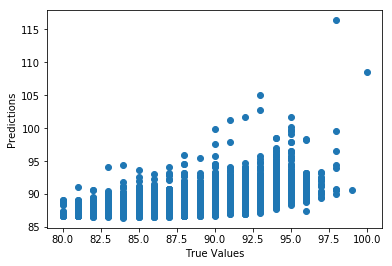

In [98]:
# Plot the results
plt.scatter(y_test, y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [99]:
# Accuracy score
print ('Accuracy:', model.score(X_test, y_test))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))
# Mean absolute error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, y_predictions))

Accuracy: 0.26553127143752064
RMSE: 2.543080483227348
MAE: 2.039664551084995
